# Baseline
Get the baseline using 5-fold CV on Training Data

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve

# df_merged_mean_15x15

In [2]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_mean_15x15_final.csv')
df_merged_mean_15x15

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,riskLevelLabel
0,2020-01-22,ukd4305-43260,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
1,2020-02-17,ukk3106-27200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
2,2020-02-29,ukk4304-34200,0.0,0.0,0.206118,0.173157,0.127656,0.066746,0.0,0.0,...,0.185487,0.127656,0.073864,0.0,0.0,0.206118,0.177503,0.127656,0.069289,1
3,2020-03-01,ukk4305-25400,0.0,0.0,0.097241,0.098771,0.247233,0.026437,0.0,0.0,...,0.105168,0.243885,0.028865,0.0,0.0,0.097241,0.101709,0.247233,0.027571,1
4,2020-03-12,uke1200-08100,0.0,0.0,0.163267,0.201963,0.107813,0.085368,0.0,0.0,...,0.216346,0.107813,0.094473,0.0,0.0,0.163267,0.207033,0.107813,0.088622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,2022-11-08,ukj3400-17700,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
187107,2022-12-02,ukk3103-29500,0.0,0.0,0.029326,0.058402,0.482674,0.010515,0.0,0.0,...,0.062560,0.482674,0.011637,0.0,0.0,0.029326,0.059867,0.482674,0.010916,1
187108,2022-12-07,ukk3103-29100,0.0,0.0,0.022588,0.178036,0.150990,0.075031,0.0,0.0,...,0.156235,0.137526,0.055946,0.0,0.0,0.018829,0.182504,0.155471,0.077890,1
187109,2022-12-08,ukk3103-29100,0.0,0.0,0.017684,0.076698,0.330753,0.016954,0.0,0.0,...,0.081440,0.329495,0.018444,0.0,0.0,0.016590,0.078670,0.333127,0.017600,0


In [4]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [5]:
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')


df_train.drop(['time', 'site'], axis=1, inplace=True)


y_train = df_train.pop('riskLevelLabel')

X_train = df_train


print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)


In [6]:
counts = y_train.value_counts()
counts_normalized = y_train.value_counts(normalize=True)
print(counts)
print(counts_normalized)

0    109127
1      3139
Name: riskLevelLabel, dtype: int64
0    0.97204
1    0.02796
Name: riskLevelLabel, dtype: float64


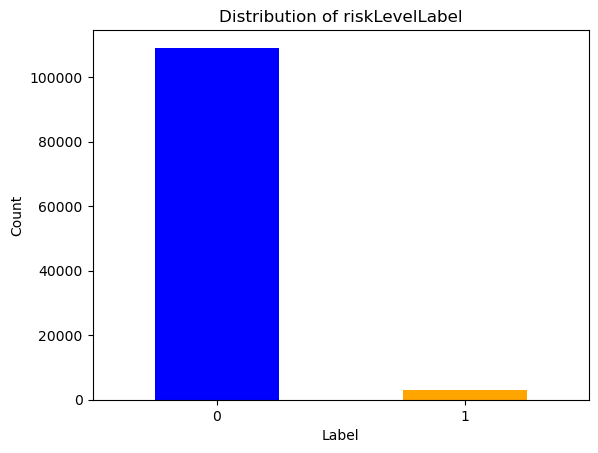

In [7]:
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of riskLevelLabel')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [8]:
# Randomise order of training pairs
train_labels_mean_zero_new = train_labels_mean_zero.sample(frac = 1)

train_test_dict = {}

# Get CV Train and Test time-site pairs
for i in range(5):
  split_index = round(len(train_labels_mean_zero_new)/5)
  train_test_dict[f'test_{i+1}'] = train_labels_mean_zero_new[i*split_index: (i+1)*split_index]
  train_test_dict[f'train_{i+1}'] = train_labels_mean_zero_new.drop(train_labels_mean_zero_new.index[i*split_index: (i+1)*split_index])

In [13]:
ACCs_baseline=0
PREs_baseline=0
RECs_baseline=0
F1_baseline=0
AUCs_PRC_baseline=0
AUCs_ROC_baseline=0

for i in range(5):
    print(i+1,':')
    test_d = train_test_dict[f'test_{i+1}']
    train_d = train_test_dict[f'train_{i+1}']

    df_train = df_merged_mean_15x15.merge(train_d, on=['time', 'site'], how='inner')
    df_test = df_merged_mean_15x15.merge(test_d, on=['time', 'site'], how='inner')

    df_train.drop(['time', 'site'], axis=1, inplace=True)
    df_test.drop(['time', 'site'], axis=1, inplace=True)

    y_train = df_train.pop('riskLevelLabel')
    y_test = df_test.pop('riskLevelLabel')

    X_train = df_train
    X_test = df_test

    label_ratio_train = y_train.value_counts(normalize=True).to_dict()
    num_test_samples = len(X_test)
    np.random.seed(100)
    random_predictions_test = np.random.choice(list(label_ratio_train.keys()), num_test_samples, p=list(label_ratio_train.values()))

    accuracy_test = accuracy_score(y_test, random_predictions_test)    
    precision_test = precision_score(y_test, random_predictions_test)
    recall_test = recall_score(y_test, random_predictions_test)
    f1_test = f1_score(y_test, random_predictions_test)
    auc_test = roc_auc_score(y_test, random_predictions_test) 
    precision, recall, _ = precision_recall_curve(y_test, random_predictions_test)
    auc_prc_test = auc(recall, precision)
    
    print(f'Accuracy: {accuracy_test:.2%}')
    print(f'AUC of ROC curve: {auc_test:.4}')
    print(f'Precision: {precision_test:.4}')
    print(f'Recall: {recall_test:.4}')
    print(f'AUC of precision-recall curve: {auc_prc_test:.4}')
    print(f'F1-score: {f1_test:.4}')
    print("Confusion matrix:\n", confusion_matrix(y_test, random_predictions_test))

    ACCs_baseline += accuracy_test
    PREs_baseline += precision_test
    RECs_baseline += recall_test
    F1_baseline += f1_test
    AUCs_ROC_baseline += auc_test
    AUCs_PRC_baseline += auc_prc_test

1 :
Accuracy: 94.47%
AUC of ROC curve: 0.4968
Precision: 0.02198
Recall: 0.02212
AUC of precision-recall curve: 0.03583
F1-score: 0.02205
Confusion matrix:
 [[21197   623]
 [  619    14]]
2 :
Accuracy: 94.41%
AUC of ROC curve: 0.4981
Precision: 0.02536
Recall: 0.02439
AUC of precision-recall curve: 0.03913
F1-score: 0.02486
Confusion matrix:
 [[21182   615]
 [  640    16]]
3 :
Accuracy: 94.60%
AUC of ROC curve: 0.4997
Precision: 0.02636
Recall: 0.02824
AUC of precision-recall curve: 0.04033
F1-score: 0.02727
Confusion matrix:
 [[21223   628]
 [  585    17]]
4 :
Accuracy: 94.59%
AUC of ROC curve: 0.5021
Precision: 0.0311
Recall: 0.03273
AUC of precision-recall curve: 0.04508
F1-score: 0.0319
Confusion matrix:
 [[21219   623]
 [  591    20]]
5 :
Accuracy: 94.53%
AUC of ROC curve: 0.5032
Precision: 0.03459
Recall: 0.03454
AUC of precision-recall curve: 0.04826
F1-score: 0.03456
Confusion matrix:
 [[21202   614]
 [  615    22]]


In [14]:
ACC_baseline = ACCs_baseline/5
PRE_baseline = PREs_baseline/5
REC_baseline = RECs_baseline/5
F1_baseline = F1_baseline/5
AUC_ROC_baseline = AUCs_ROC_baseline/5
AUC_PRC_baseline = AUCs_PRC_baseline/5

In [15]:
results_mean_15x15_baseline = pd.DataFrame([['Baseline', ACC_baseline, AUC_ROC_baseline, PRE_baseline, REC_baseline, AUC_PRC_baseline, F1_baseline]], 
                                           columns=['Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AUC_PRC', 'f1 score'])
results_mean_15x15_baseline

,Model,Accuracy,AUC_ROC,Precision,Recall,AUC_PRC,f1 score
0,Baseline,0.945192,0.499984,0.027877,0.028403,0.041724,0.028128
